In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Tree(S0, n, sigma):
    u = np.exp(sigma/np.sqrt(n))
    d = np.exp(-sigma/np.sqrt(n))
    tree = [[S0*u**j*d**(i-j) if j <=i else 0 for j in range(n+1)] for i in range(n+1)]
    return np.array(tree)

In [3]:
def EuropeanOption(T, r, K, n, S0, sigma, SS, t):
    u = np.exp(sigma/np.sqrt(n));
    d = np.exp(-sigma/np.sqrt(n));
    #risk neutral probability
    q = (np.exp(r*T/n)-d)/(u-d);
    #length of the time periods
    h = T/n;
    if t == 'c':
        EuroCall = np.zeros((n+1, n+1))
        for j in range(n+1):
            EuroCall[-1, j] = max(SS[-1, j] - K, 0)
        for i in range(n-1,-1, -1):
            for j in range(i+1):
                EuroCall[i, j] = np.exp(-r*h)*((1-q) * EuroCall[i+1, j] + q * EuroCall[i+1, j+1]);
        return EuroCall
    
    elif t == 'p':
        EuroPut = np.zeros((n+1, n+1))

        for j in range(n+1):
            EuroPut[-1, j] = max(K - SS[-1, j], 0)
    
        for i in range(n-1,-1, -1):
            for j in range(i+1):
                EuroPut[i, j] = np.exp(-r*h)*((1-q) * EuroPut[i+1, j] + q * EuroPut[i+1, j+1]);
        return EuroPut
    else:
        print("Input Error")
        return

In [4]:
def AmericanOption(T, r, K, n, S0, sigma, SS, t):
    u = np.exp(sigma/np.sqrt(n));
    d = np.exp(-sigma/np.sqrt(n));
    #risk neutral probability
    q = (np.exp(r*T/n)-d)/(u-d);
    if q > 1:
        raise Exception('Error')
    #length of the time periods
    h = T/n;
    if t == 'c':
        frontier_call = dict()
        AmericanCall = np.zeros((1+n, 1+n))
        EPA_call = np.zeros((1+n, 1+n))
        for i in range(n+1):
            for j in range(i+1):
                AmericanCall[i, j] = max(SS[i, j] - K, 0);
        for j in range(1+n):
            if AmericanCall[n, j] > 0:
                EPA_call[n, j] = 1
                frontier_call[n*h] = SS[n, j]
        for i in range(n-1, -1, -1):
            for j in range(i+1):
                temp_call = np.exp(-r*h)*((1-q) * AmericanCall[i+1, j] + q * AmericanCall[i+1, j+1]);
                if AmericanCall[i,j] <= temp_call:
                    AmericanCall[i,j] = temp_call
                else:
                    EPA_call[i,j] = 1
                    frontier_call[i*h] = SS[i,j]
        return AmericanCall, EPA_call, frontier_call
    elif t == 'p':
        frontier_put = dict()
        AmericanPut = np.zeros((1+n, 1+n))
        EPA_put = np.zeros((1+n, 1+n))
        for i in range(n+1):
            for j in range(i+1):
                AmericanPut[i, j] = max(K - SS[i, j], 0);
        for j in range(1+n):
            if AmericanPut[n, j] > 0:
                EPA_put[n, j] = 1
                frontier_put[n*h] = SS[n, j]
        for i in range(n-1, -1, -1):
            for j in range(i+1):
                temp_put = np.exp(-r*h)*((1-q) * AmericanPut[i+1, j] + q * AmericanPut[i+1, j+1]);
                if AmericanPut[i,j] <= temp_put:
                    AmericanPut[i,j] = temp_put
                else:
                    EPA_put[i,j] = 1    
                    frontier_put[i*h] = SS[i, j]

        return AmericanPut, EPA_put, frontier_put

1. European

In [5]:
n = 20
S0 = 110 
r = 0.0
K = 100 
sigma = 0.2 
T = 1.
mu = r
SS = Tree(S0, n, sigma)
EuroC = EuropeanOption(T, r, K, n, S0, sigma, SS, 'c')
EuroC[0,0]

14.234664046073092

In [6]:
n = 20
S0 = 100 
r = 0.0
K = 90 
sigma = 0.2 
T = 1.
mu = r
SS = Tree(S0, n, sigma)
EuroP = EuropeanOption(T, r, K, n, S0, sigma, SS, 'p')
EuroP[0,0]

3.5905997406954437

2. American

In [7]:
n = 20
S0 = 110 
r = 0.0
K = 100 
sigma = 0.2 
T = 1.
mu = r
SS = Tree(S0, n, sigma)
AmericanCall, EPA_call, frontier_call = AmericanOption(T, r, K, n, S0, sigma, SS, 'c')
AmericanCall[0,0]

14.234664046073096

In [8]:
n = 20
S0 = 100 
r = 0.0
K = 90 
sigma = 0.2 
T = 1.
mu = r
SS = Tree(S0, n, sigma)
AmericanPut, EPA_put, frontier_put = AmericanOption(T, r, K, n, S0, sigma, SS, 'p')
AmericanPut[0,0]

3.5905997406954437

3. frontier

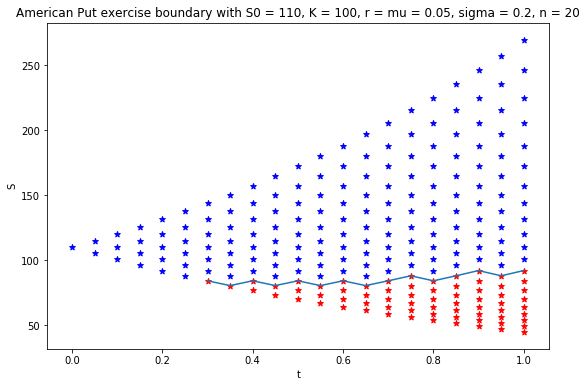

In [9]:
plt.figure(figsize=(9,6))
n = 20
S0 = 110 
r = 0.05
K = 100 
sigma = 0.2 
T = 1.
mu = r

SS = Tree(S0, n, sigma)
AmericanPut, EPA_put, frontier_put = AmericanOption(T, r, K, n, S0, sigma, SS, 'p')
plt.plot(list(frontier_put.keys()), list(frontier_put.values()))
h = T/n
for i in range(n+1):
    for j in range(i+1):
        if EPA_put[i,j] == 1:
            plt.scatter(i*h, SS[i,j], c = 'r', marker = '*')
        else:
            plt.scatter(i*h, SS[i,j], c = 'b', marker = '*')
plt.title("American Put exercise boundary with S0 = {}, K = {}, r = mu = {}, sigma = {}, n = {}".format(S0, K,r, sigma, n))
plt.xlabel('t')
plt.ylabel('S')
plt.savefig('Bin_boundary.jpg')
plt.show()

3. relationship with r and n

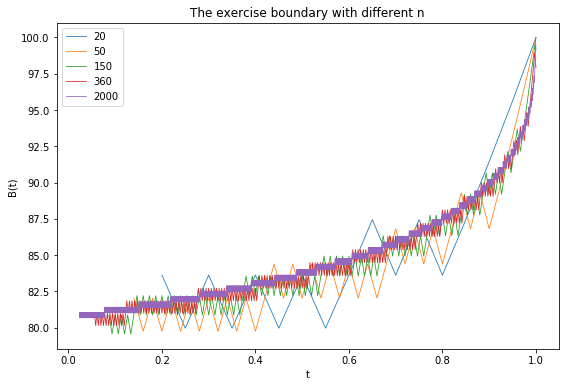

In [10]:
test_n = [20, 50, 150, 360, 2000]
S0 = 100 
r = 0.05
K = 100 
sigma = 0.2 
T = 1.
mu = r

plt.figure(figsize=(9,6))
for ni in test_n:
    SS = Tree(S0, ni, sigma)
    AmericanPut, EPA_put, frontier_put = AmericanOption(T, r, K, ni, S0, sigma, SS, 'p')
    plt.plot(list(frontier_put.keys()), list(frontier_put.values()), linewidth = '.8')
plt.title('The exercise boundary with different n')
plt.xlabel('t')
plt.ylabel('B(t)')
plt.legend(test_n)
plt.savefig('relation_n.jpg')
plt.show()

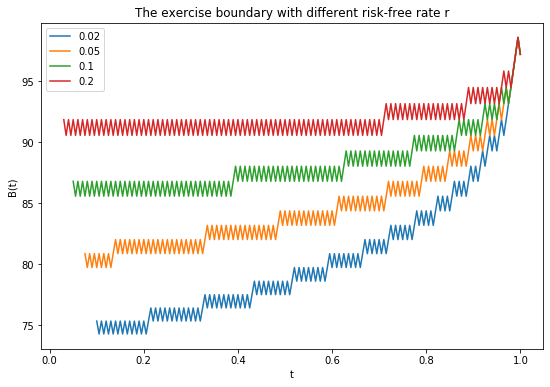

In [11]:
test_r = [0.02, 0.05, 0.1, 0.2]
n = 360
S0 = 100 
K = 100 
sigma = 0.2 
T = 1.
mu = r

plt.figure(figsize=(9,6))
for ri in test_r:
    SS = Tree(S0, 200, sigma)
    AmericanPut, EPA_put, frontier_put = AmericanOption(T, ri, K, 200, S0, sigma, SS, 'p')
    plt.plot(list(frontier_put.keys()), list(frontier_put.values()))
plt.title('The exercise boundary with different risk-free rate r')
plt.xlabel('t')
plt.ylabel('B(t)')
plt.legend(test_r)
plt.savefig('relation_r.jpg')
plt.show()